<center> <img src="https://jaliscocomovamos.org/wp-content/uploads/2021/04/iteso-logo.jpg" align="center" width="960" height="480"/> </center>

<center><font color=#555555><font size=6> ITESO </font> <br> <br>
    
<center><font color=#555555><font size=5> Microstructure and Trading systems</font> <br> <br> <br> <br>

<center><font color=#555555><font size=6> Diego Pintor Ochoa, if726622@iteso.mx </font> <br> <br>
   
<center> <font color= #555555> <font size = 4> June 2022 </a> | <font color= #555555> <font size = 4> Repository: <a href='https://github.com/PintorOD1997/Lab1-Market-Microstructure-'>Link</a></font>

<hr style="border:0.02in solid gray"> </hr>

<center> <font color= #555555> <font size = 6> Laboratory 2 </font> <br> <br> <font color= #555555> <font size = 5> Models  </font>

<hr style="border:0.02in solid gray"> </hr>

<br>

<font color= #555555> <font size = 4> Abstract </font>

<font color= #6B6B6B> <font size = 3>  This Laboratory was created with the purpose of demonstrating the basic metrics of the OrderBooks and Public Trades, providing quantitative insights on them, and highlighting the main concepts that will be used throughout the course.</font>

<br>

# <font color= #6B6B6B> <font size = 6> 1. Introduction </font>

<hr style="border:0.02in solid gray"> </hr>

Market microstructure is a branch of finance concerned with the details of how exchange occurs in markets. While the theory of market microstructure applies to the exchange of real or financial assets, more evidence is available on the microstructure of financial markets due to the availability of transactions data from them.

The major thrust of market microstructure research examines the ways in which the working processes of a market affect determinants of transaction costs, prices, quotes, volume, and trading behavior. In the twenty-first century, innovations have allowed an expansion into the study of the impact of market microstructure on the incidence of market abuse, such as insider trading, market manipulation and broker-client conflict.



<br>

# <font color= #6B6B6B> 2. Install/Load Packages and Depedencies </font>

<hr style="border:0.02in solid gray"> </hr>

## <font color= #6B6B6B> 2.1 Python Packages </font> <font color= #555555>

In order to run this notebook, it is necessary to have installed and/or have the _requirements.txt_ file with the following: 

- pandas>=1.4.2
- numpy>=1.18.5
- jupyter>=1.0.0
- plotly>=4.14


## <font color= #6B6B6B> 2.2 Files Dependencies </font> <font color= #555555>

The following are the file dependencies that are needed to run this notebook:

- files/orderbooks_05jul21.json : Orderbook in JSON format


## <font color= #6E6E6E> 2.3 Install Packages</font>

In [1]:
%%capture
#!{sys.executable} -m pip install -r requirements.txt
# Install all the pip packages in the requirements.txt
import numpy as np
import pandas as pd
import data as dt
import functions as ft


<br>

# <font color= #6B6B6B> 3. Data Description </font>

### With the purpose of evaluating the previously stated models, OrderBook mid prices will be employed as price references. 

<hr style="border:0.02in solid gray"> </hr>

In [2]:
# Load Data
# OrderBook opening using data openOB function
data_ob = dt.openOB()
# Orderbook timestamp
ob_ts = list(data_ob.keys())
# Timestamp listing
l_ts = [pd.to_datetime(i_ts) for i_ts in ob_ts]
# MidPrice, using the metrics dataframe from the functions library
x,_,_ = ft.OB_metrics(data_ob)
midprice = x["Mid Price"]
pd.DataFrame(midprice).head()

,Mid Price
2021-07-05 13:06:46.571000+00:00,28272.5
2021-07-05 13:06:47.918000+00:00,28272.5
2021-07-05 13:06:49.414000+00:00,28272.5
2021-07-05 13:06:51.077000+00:00,28276.5
2021-07-05 13:06:52.426000+00:00,28276.5


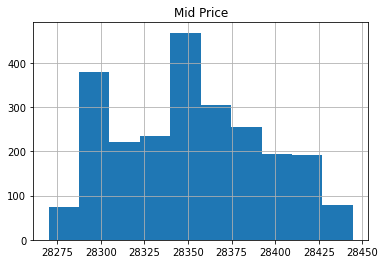

In [3]:
pd.DataFrame(midprice).hist();

# <font color= #6B6B6B> 4.1. Experiment 1. APT Model for all mid prices  </font>

In [6]:
# Martingale count, all scenarios

e1 = [midprice[i] == midprice[i+1] for i in range(len(midprice)-1)]
e2 = [midprice[i] != midprice[i+1] for i in range(len(midprice)-1)]

APT_dic = {"e1" : {"Amount" : sum(e1), "Ratio" : sum(e1)/len(midprice)}, 
            "e2" : {"Amount" : sum(e2), "Ratio" : sum(e2)/len(midprice)},
            "total" : len(midprice)-1 }

# Asset Pricing Theory, DataFrame results
APT_df = pd.DataFrame(APT_dic).T

In [7]:
APT_df

,Amount,Ratio
e1,1763.0,0.734277
e2,637.0,0.265306
total,2400.0,2400.000000


# <font color= #6B6B6B> 4.2. Experiment 2. APT Model for minute-segmented prices  </font>

In this case, the 60 minutes data of the orderbooks was segmented into each minute. This was in order for us to evaluate the model in a more constrained timeframe.
Due to the calculations not considering the first trade of each minute, 60 trades were discarded, giving us 2340 trades in total instead of the previous 2400 trades.

In [9]:
### Second Experiment: Martingale evaluation of the Asset Pricing theory using minute segmented data
midprice = pd.DataFrame(midprice)
# Minute indexed dictionary, index is Hour + Minute, to avoid minute reprisal.
dic = {}
for index, row in midprice.iterrows():
    key = str(index.hour) + ":" + str(index.minute)
    value = row["Mid Price"]
    try:
        dic[key].append(value)
    except KeyError:
        dic[key] = [value]
# Martingale Evaluation of the segmented data
APT_exp2 = {}
for i in list(dic): # <- iteración sobre índices del diccionario
    e1 = sum([dic[i][i_t] == dic[i][i_t+1] for i_t in range(len(dic[i])-1)])
    e2 = sum([dic[i][i_t] != dic[i][i_t+1] for i_t in range(len(dic[i])-1)])
    APT_exp2[i] = (
        {"e1" :{"Amount" :  e1, "Ratio" : e1/(len(dic[i])-1)}, 
         "e2" :{"Amount" :  e2, "Ratio" : e2/(len(dic[i])-1)},
         "total" : len(dic[i])-1
         }
        )
  
# Experiment 2 results, for each minute, as DataFrame
APT_minute_df = pd.DataFrame(data = {
    "e1": [APT_exp2[i]["e1"]["Amount"] for i in list(APT_exp2)],
    "e2": [APT_exp2[i]["e2"]["Amount"] for i in list(APT_exp2)],
    "Total": [APT_exp2[i]["total"] for i in list(APT_exp2)],
    "Ratio e1": [APT_exp2[i]["e1"]["Ratio"] for i in list(APT_exp2)],
    "Ratio e2": [APT_exp2[i]["e2"]["Ratio"] for i in list(APT_exp2)]
}, index = list(dic))

# Experiment 2 results, Ratio mean and total trades
APT_min_results_df = pd.DataFrame(data = {
    "e1 Ratio Mean" : np.array(APT_minute_df["Ratio e1"]).mean(),
    "e2 Ratio Mean" : np.array(APT_minute_df["Ratio e2"]).mean(),
    "Total Trades" : np.array(APT_minute_df["Total"]).sum()
},index = range(1))

In [10]:

APT_minute_df.head()

,e1,e2,Total,Ratio e1,Ratio e2
13:6,6,2,8,0.750000,0.250000
13:7,27,13,40,0.675000,0.325000
13:8,31,8,39,0.794872,0.205128
13:9,27,11,38,0.710526,0.289474
13:10,30,10,40,0.750000,0.250000


In [11]:
APT_min_results_df

,e1 Ratio Mean,e2 Ratio Mean,Total Trades
0,0.743515,0.256485,2340


# <font color= #6B6B6B> 4.3. Experiment 3. APT Model, both for all data and minute-segmented data, for the Volume-Weighted Mid Prices</font>

In [19]:
x,_,_ = ft.OB_metrics(data_ob)
Wmidprice = x["Weighted MidPrice (Ask)"]
e1 = [Wmidprice[i] == Wmidprice[i+1] for i in range(len(Wmidprice)-1)]
e2 = [Wmidprice[i] != Wmidprice[i+1] for i in range(len(Wmidprice)-1)] # puede ser definido por antonomasia
Wmetricas = {"e1" : {"Amount" : sum(e1), "Ratio" : sum(e1)/len(Wmidprice)}, 
            "e2" : {"Amount" : sum(e2), "Ratio" : sum(e2)/len(Wmidprice)},
            "total" : len(Wmidprice)-1 }
APT_df = pd.DataFrame(Wmetricas).T
Wmidprice = pd.DataFrame(Wmidprice)
Wdic = {}
for index, row in Wmidprice.iterrows():
    key = str(index.hour) + ":" + str(index.minute)
    value = row["Weighted MidPrice (Ask)"]
    try:
        Wdic[key].append(value)
    except KeyError:
        Wdic[key] = [value]
WAPT_exp2 = {}
for i in list(Wdic):
    e1 = sum([Wdic[i][i_t] == Wdic[i][i_t+1] for i_t in range(len(Wdic[i])-1)])
    e2 = sum([Wdic[i][i_t] != Wdic[i][i_t+1] for i_t in range(len(Wdic[i])-1)])
    WAPT_exp2[i] = (
        {"e1" :{"Amount" :  e1, "Ratio" : e1/(len(Wdic[i])-1)}, 
         "e2" :{"Amount" :  e2, "Ratio" : e2/(len(Wdic[i])-1)},
         "total" : len(Wdic[i])-1
         }
        )
WAPT_minute_df = pd.DataFrame(data = {
    "e1": [WAPT_exp2[i]["e1"]["Amount"] for i in list(WAPT_exp2)],
    "e2": [WAPT_exp2[i]["e2"]["Amount"] for i in list(WAPT_exp2)],
    "Total": [WAPT_exp2[i]["total"] for i in list(WAPT_exp2)],
    "Ratio e1": [WAPT_exp2[i]["e1"]["Ratio"] for i in list(WAPT_exp2)],
    "Ratio e2": [WAPT_exp2[i]["e2"]["Ratio"] for i in list(WAPT_exp2)]
}, index = list(dic))
WAPT_min_results_df = pd.DataFrame(data = {
    "e1 Ratio Mean" : np.array(WAPT_minute_df["Ratio e1"]).mean(),
    "e2 Ratio Mean" : np.array(WAPT_minute_df["Ratio e2"]).mean(),
    "Total Trades" : np.array(WAPT_minute_df["Total"]).sum()
},index = range(1))

In [20]:
APT_df

,Amount,Ratio
e1,1622.0,0.675552
e2,778.0,0.324032
total,2400.0,2400.000000


In [21]:
WAPT_minute_df.head()

,e1,e2,Total,Ratio e1,Ratio e2
13:6,6,2,8,0.750000,0.250000
13:7,27,13,40,0.675000,0.325000
13:8,26,13,39,0.666667,0.333333
13:9,26,12,38,0.684211,0.315789
13:10,27,13,40,0.675000,0.325000


In [22]:
WAPT_min_results_df

,e1 Ratio Mean,e2 Ratio Mean,Total Trades
0,0.686378,0.313622,2340


# <font color= #6B6B6B> 4.4. Public Trades Hourly Trades  </font>

In [16]:
tradesHora.head()

timestamp
2022-05-10 00:00:00    12000
2022-05-10 01:00:00    11900
2022-05-10 02:00:00    11900
2022-05-10 03:00:00    11900
2022-05-10 04:00:00    12000
Freq: 60T, Name: side, dtype: int64

# <font color= #6B6B6B> 4.5. Sell and Buy Volume, Difference in Trade Count  </font>

In [20]:
volume

side
buy      7338.91217
sell    10148.21080
Name: amount, dtype: float64

In [21]:
count

1300

<br>

# <font color= #6B6B6B> 4.6 Public Trades OHLVC  </font>

In [24]:
OHLCV.head()

price                                    amount
                         open      high       low      close     amount
timestamp                                                              
2022-05-10 00:00:00  30075.19  30842.21  29758.78  30770.010  897.80374
2022-05-10 01:00:00  30722.91  31340.94  30702.40  30900.682  751.42903
2022-05-10 02:00:00  30883.21  31390.16  30797.60  31033.700  731.59613
2022-05-10 03:00:00  31045.10  31152.46  30640.13  30664.400  729.39643
2022-05-10 04:00:00  30682.08  31340.86  30602.80  31215.350  768.91706

<hr style="border:0.02in solid gray"> </hr>

<br>

# <font color= #6B6B6B> <font size = 6> 5. Results </font>

<hr style="border:0.02in solid gray"> </hr>

## <font color= #6B6B6B> <font size = 6> 5.1 OrderBook Results </font>

It can be highlighted that, when the *Spread* is lower, the *Bid & Ask Volumes* are the closest.
Whilst the *OrderBook Imbalance* remained positive the entire time, it was relatively close, which means that the *Spread*, wasn't high enough to make the orders cross the *Spread*.

The *Weighted Mid Price (Ask)* was significantly lower than the *Weighted Mid Price (Bid)*, in fact, it was almost exactly half. This can be attributed to the calculation method of the *Weighted Mid Price (Ask)*, which uses only one source of prices.

The *VWAP* remained relatively close to the Mid Price the entire time, which means that, adjusted to volume, the average price remained really close to the settlements between Bids and Asks.

Observing the *OrderBook Imbalance* through a Histogram, we can observe that most of the time, the imbalance remained stable between 0.3 and 0.6.

## <font color= #6B6B6B> <font size = 6> 5.2 Public Trades Results </font>

We can observe that, hour-by-hour, the amount of Public Trades remained roughly the same.

We can also observe, that despite the *volume* being heavily biased towards selling, the *Difference in Trade Count* remained on the side of *Buying*, 1300 trades on that side.

## <font color= #6B6B6B> <font size = 6> 6. Final Conclusions </font>


Market Microstructures provide a more in-depth analysis of the financial markets, on top of the traditional analysis already being made. This type of analysis includes a snapshot of the current trends observing the OrderBook, which provides us insight on how many Bids or Asks are being made, and this is chained with their prices to get a more complete snapshot of the market.
Due to the sheer size of the market, the amount of transactions needs to be observed on the miliseconds order, which is both more precise and more intensive in resources.


A more structured set of instructions, provided for this Laboratory, would have been a welcome addition to this, but inspite of all the shortcomings, this Laboratory was a really interesting approach to the financial markets.

Due to the nature and size constraint of the origin files for the OrderBook and Public Trades, more extensive analysis of more difficult market conditions wasn't possible, due to such market conditions not being present in the records.

Due to time constraints, more in-depth visualization wasn't implemented, Parquet file type was possible, but not implemented, again, due to time constraints. 

<br>

# <font color= #6B6B6B> <font size = 6> 7. References </font>

<hr style="border:0.02in solid gray"> </hr>

[1] O'Hara, Maureen, Market Microstructure Theory, Blackwell, Oxford, 1995, ISBN 1-55786-443-8, p.1.

[2]  R.Almgren and N.Chriss, "Optimal execution of portfolio transactions" J. Risk, 3 (Winter 2000/2001) pp.5–39

<br>